# Loading Packages

In [2]:
import datetime
print(datetime.datetime.now())

2020-08-16 21:50:45.833625


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16


plt.rc('figure', figsize=[8.0, 5.0])     
plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)    
plt.rc('legend', fontsize=SMALL_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE)  
plt.rc('axes', grid=True)

# Load Data

In [5]:
jewelry_customer = pd.read_csv("C://Users//shrut//Documents//Shruti admin//Canada 1//QU//Module 4//Machine Learning & AI//jewelry_customers.csv")

list(jewelry_customer)
jewelry_customer.shape
jewelry_customer.info()
jewelry_customer.describe().transpose()
jewelry_customer.head()
jewelry_customer.tail()

['Age', 'Income', 'SpendingScore', 'Savings']

(505, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


,count,mean,std,min,25%,50%,75%,max
Age,505.0,59.019802,24.140043,17.0,34.000000,59.000000,85.000000,97.0
Income,505.0,75513.291089,35992.922184,12000.0,34529.000000,75078.000000,107100.000000,142000.0
SpendingScore,505.0,0.505083,0.259634,0.0,0.304792,0.368215,0.768279,1.0
Savings,505.0,11862.455867,4949.229253,0.0,6828.709702,14209.932802,16047.268331,20000.0


,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


,Age,Income,SpendingScore,Savings
500,28,101206,0.387441,14936.775389
501,93,19934,0.203140,17969.693769
502,90,35297,0.355149,16091.401954
503,91,20681,0.354679,18401.088445
504,89,30267,0.289310,14386.351880


In [6]:
#Profiling to understand data better
import pandas_profiling
pandas_profiling.ProfileReport(jewelry_customer)

In [7]:
#from the above profiling we can see that Savings and SpendingScore are highly correlated, so I removed Savings as SpendingScore is more relevant for the Jewelry store in undertsanding their customer segments
#removing Age to make the visualization easy
jewelry_customer = jewelry_customer.drop(['Savings'], axis=1)
jewelry_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 12.0 KB


# Normalizing Data

In [8]:
X = jewelry_customer.copy()
X.head()

,Age,Income,SpendingScore
0,58,77769,0.791329
1,59,81799,0.791082
2,62,74751,0.702657
3,59,74373,0.765680
4,87,17760,0.348778


In [9]:
scaler = StandardScaler()
features = ['Age', 'Income', 'SpendingScore']
X[features] = scaler.fit_transform(X[features])

X.shape
X.info()
X.describe().transpose()
X.head()
X.tail()

(505, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    float64
 1   Income         505 non-null    float64
 2   SpendingScore  505 non-null    float64
dtypes: float64(3)
memory usage: 12.0 KB


,count,mean,std,min,25%,50%,75%,max
Age,505.0,5.672031e-17,1.000992,-1.742394,-1.037472,-0.000821,1.077295,1.574888
Income,505.0,-2.638154e-17,1.000992,-1.766355,-1.139805,-0.012106,0.878451,1.849048
SpendingScore,505.0,-1.954432e-16,1.000992,-1.947295,-0.772201,-0.527678,1.014725,1.908103


,Age,Income,SpendingScore
0,-0.042287,0.062733,1.103593
1,-0.000821,0.174811,1.102641
2,0.123577,-0.021200,0.761727
3,-0.000821,-0.031712,1.004705
4,1.160228,-1.606165,-0.602619


,Age,Income,SpendingScore
500,-1.286268,0.714535,-0.453557
501,1.409024,-1.545704,-1.164109
502,1.284626,-1.118447,-0.578054
503,1.326092,-1.524929,-0.579866
504,1.243160,-1.258335,-0.831890


# Plotting Raw Data

<Figure size 576x396 with 0 Axes>

Text(0.5, 1.0, 'Jewelry Store')

Text(0.5, 0, 'Income')

Text(0, 0.5, 'Spending Score')

(array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 <a list of 10 Text major ticklabel objects>)

(array([-2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 <a list of 11 Text major ticklabel objects>)

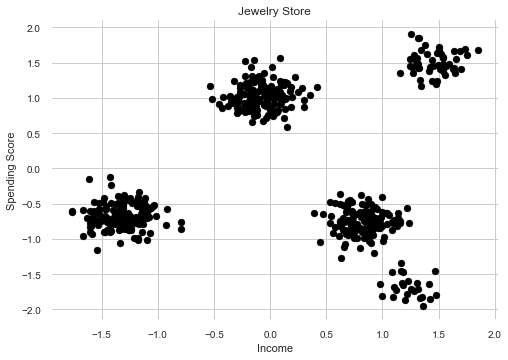

In [10]:
plt.figure();

plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c="black");
plt.title("Jewelry Store");
plt.xlabel('Income');
plt.ylabel('Spending Score');
plt.xticks();
plt.yticks();
plt.grid()

# K-Means Clustering

In [11]:
k_means = KMeans(n_clusters=5, random_state=42)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [12]:
k_means.labels_

array([1, 1, 1, 1, 0, 3, 1, 0, 0, 0, 4, 2, 2, 2, 1, 4, 1, 0, 0, 4, 2, 4,
       1, 0, 4, 3, 3, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 3, 1,
       1, 3, 4, 3, 2, 1, 0, 2, 3, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 3, 3, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 3, 1, 4, 1, 0, 0, 2, 2, 1,
       1, 1, 1, 1, 3, 0, 1, 3, 2, 1, 1, 2, 2, 3, 2, 3, 2, 0, 0, 2, 2, 1,
       0, 2, 1, 2, 2, 2, 1, 2, 3, 0, 2, 0, 0, 0, 2, 4, 1, 0, 1, 1, 2, 1,
       2, 1, 3, 0, 4, 3, 1, 2, 0, 1, 1, 3, 1, 3, 1, 4, 1, 0, 1, 2, 0, 1,
       0, 4, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 2, 3, 3, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 3, 2,
       0, 0, 0, 2, 1, 2, 1, 2, 1, 0, 3, 1, 0, 0, 0, 0, 1, 0, 2, 3, 2, 0,
       1, 1, 2, 0, 2, 3, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 3, 1,
       1, 1, 4, 1, 2, 0, 3, 3, 3, 0, 1, 2, 0, 0, 2, 2, 1, 1, 4, 1, 1, 0,
       1, 0, 2, 3, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2, 2, 4, 2, 0,
       0, 2, 4, 0, 0, 3, 1, 2, 2, 1, 2, 0, 0, 2, 1,

In [13]:
# cluster centers
k_means.cluster_centers_

array([[ 1.19238486, -1.32510593, -0.67963841],
       [ 0.03879611, -0.08524639,  1.02721559],
       [-1.08815238,  0.82744102, -0.75240648],
       [-1.44466803,  1.46050665,  1.51057952],
       [ 1.11876151,  1.23565419, -1.68367042]])

In [25]:
# the cluster centers are the feature means
inv = scaler.inverse_transform(k_means.cluster_centers_)
inv

array([[8.77755102e+01, 2.78661020e+04, 3.28800461e-01],
       [5.99554140e+01, 7.24480637e+04, 7.71518368e-01],
       [3.27777778e+01, 1.05265810e+05, 3.09926130e-01],
       [2.41800000e+01, 1.28029120e+05, 8.96891640e-01],
       [8.60000000e+01, 1.19944040e+05, 6.83780993e-02]])

# Internal Validation Metrics

In [36]:
silhouette_score(X, k_means.labels_)

0.8543105542695458

# Visualizing and plotting silhouette scores

<Figure size 576x396 with 0 Axes>

Text(0.5, 1.0, 'K-Means (Dot Size = Silhouette Distance)')

Text(0.5, 0, 'Income')

Text(0, 0.5, 'Spending Score')

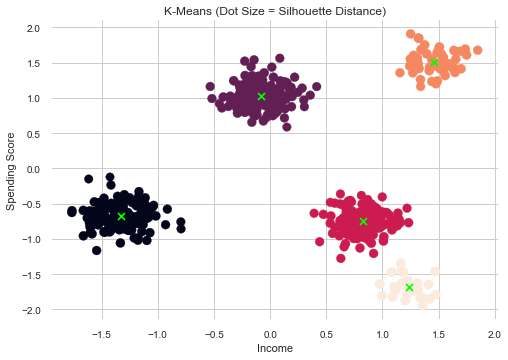

In [27]:
sample_silhouette_values = silhouette_samples(X, k_means.labels_)
sizes = 100*sample_silhouette_values

plt.figure();

plt.scatter(X.iloc[:, 1], X.iloc[:, 2], s=sizes, c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2], marker='x', c="lime")

plt.title("K-Means (Dot Size = Silhouette Distance)");
plt.xlabel('Income');
plt.ylabel('Spending Score');
plt.grid()

In [19]:
sample_silhouette_values = silhouette_samples(X, k_means.labels_)

X_tmp = X.copy()
X_tmp['Cluster ID'] = k_means.labels_

X_tmp['Silhouette'] = sample_silhouette_values
X_tmp = X_tmp.sort_values(['Silhouette'])
X_tmp.head()
X_tmp.tail()

,Age,Income,SpendingScore,Cluster ID,Silhouette
255,0.952897,-1.426479,-0.121573,0,0.668194
382,-0.000821,0.414623,1.160967,1,0.687377
410,-0.042287,0.086150,1.562724,1,0.688692
274,-0.664277,0.726632,-0.474595,2,0.691235
407,-0.622811,1.088200,-0.755187,2,0.702739


,Age,Income,SpendingScore,Cluster ID,Silhouette
379,1.243160,-1.397806,-0.706762,0,0.888367
121,1.201694,-1.374445,-0.741044,0,0.889606
335,1.243160,-1.350862,-0.690416,0,0.889660
155,1.118762,1.117318,-1.724288,4,0.891132
19,1.201694,1.256066,-1.703353,4,0.898865


# Interpreting the Clusters

In [20]:
X['cluster'] = k_means.labels_
X

,Age,Income,SpendingScore,cluster
0,-0.042287,0.062733,1.103593,1
1,-0.000821,0.174811,1.102641,1
2,0.123577,-0.021200,0.761727,1
3,-0.000821,-0.031712,1.004705,1
4,1.160228,-1.606165,-0.602619,0
...,...,...,...,...
500,-1.286268,0.714535,-0.453557,2
501,1.409024,-1.545704,-1.164109,0
502,1.284626,-1.118447,-0.578054,0
503,1.326092,-1.524929,-0.579866,0


Text(0.5, 1.0, 'K-Means (K=5)')

Text(0.5, 0, 'Income')

Text(0, 0.5, 'SpendingScore')

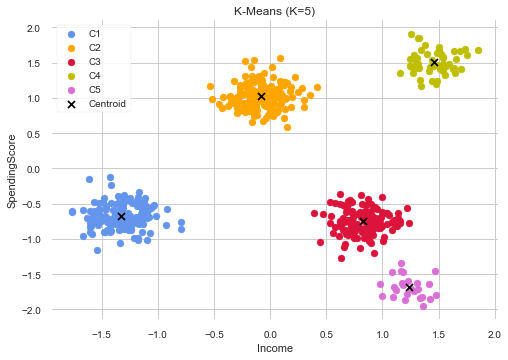

In [21]:
#plotting the clusters

x1 = X[X.cluster==0]
x2 = X[X.cluster==1]
x3 = X[X.cluster==2]
x4 = X[X.cluster==3]
x5 = X[X.cluster==4]

plt.scatter(x1.Income,x1['SpendingScore'],color='cornflowerblue', label = 'C1')
plt.scatter(x2.Income,x2['SpendingScore'],color='orange', label = 'C2')
plt.scatter(x3.Income,x3['SpendingScore'],color='crimson', label = 'C3')
plt.scatter(x4.Income,x4['SpendingScore'],color='y', label = 'C4')
plt.scatter(x5.Income,x5['SpendingScore'],color='orchid', label = 'C5')
plt.scatter(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2], marker='x', c="black", label = 'Centroid');
plt.title("K-Means (K=5)");
plt.xlabel('Income')
plt.ylabel('SpendingScore')
plt.legend()
plt.grid()

# Hyperparameter Tuning

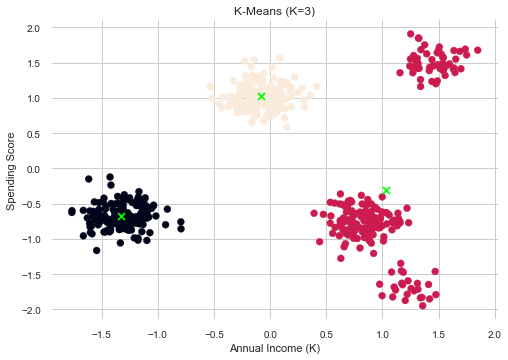

K=3, WCSS=515.19, Sil=0.68


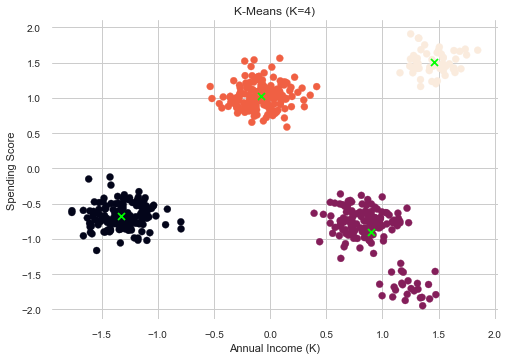

K=4, WCSS=247.33, Sil=0.78


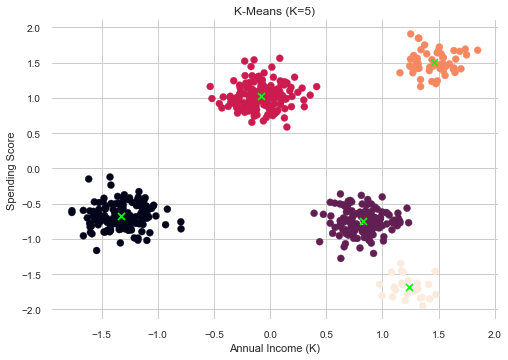

K=5, WCSS=40.72, Sil=0.85


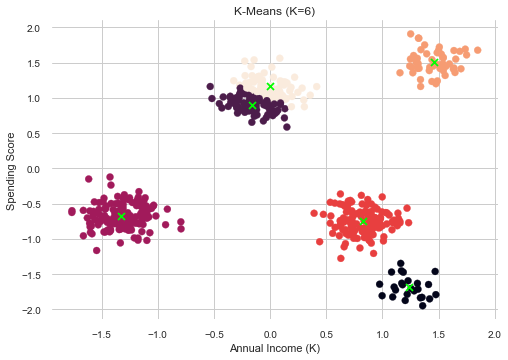

K=6, WCSS=37.03, Sil=0.67


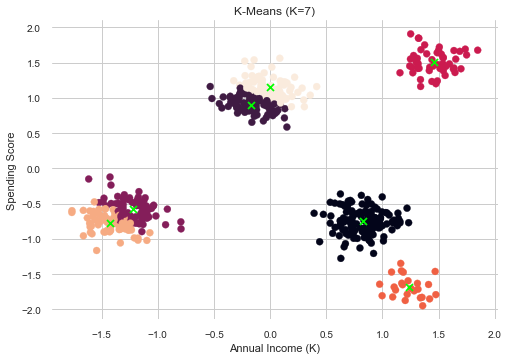

K=7, WCSS=33.62, Sil=0.50


In [22]:
#experiment with different K's
def do_kmeans(X, k):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
    k_means.fit(X)

    plt.figure();
    plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=k_means.labels_)
    plt.scatter(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2], marker='x', c="lime")
    plt.title("K-Means (K={})".format(k));
    plt.xlabel('Annual Income (K)');
    plt.ylabel('Spending Score');
    plt.grid()
    plt.show()
    
    
    wcss = k_means.inertia_
    sil = silhouette_score(X, k_means.labels_)
    print("K={}, WCSS={:.2f}, Sil={:.2f}".format(k, wcss, sil))

for k in range(3, 8):
    do_kmeans(X, k)

# Elbow Method - WCSS and Silhouette

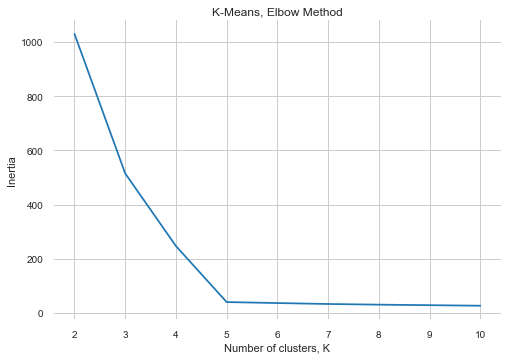

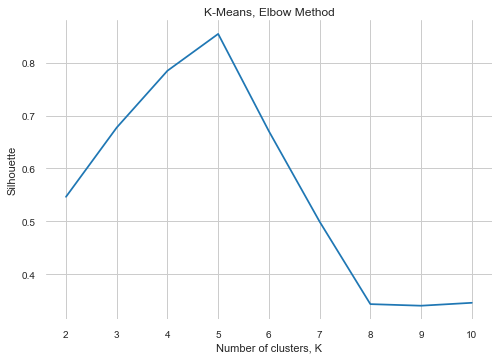

In [22]:
inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(init='k-means++', n_init=10, n_clusters=k, max_iter=1000, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.grid(True);
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");


plt.figure();
plt.grid(True);
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

In [23]:
#describing each cluster
for label in set(k_means.labels_):
    print('\nCluster {}:'.format(label))
    X_tmp = X[k_means.labels_==label].copy()
    X_tmp.describe().transpose()


Cluster 0:


,count,mean,std,min,25%,50%,75%,max
Age,147.0,1.192385,0.145499,0.828499,1.077295,1.201694,1.326092,1.574888
Income,147.0,-1.325106,0.179346,-1.766355,-1.450396,-1.327751,-1.193425,-0.793617
SpendingScore,147.0,-0.679638,0.174358,-1.164109,-0.784883,-0.695375,-0.569890,-0.121573
cluster,147.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000



Cluster 1:


,count,mean,std,min,25%,50%,75%,max
Age,157.0,0.038796,0.140017,-0.332549,-0.042287,-0.000821,0.123577,0.372373
Income,157.0,-0.085246,0.173547,-0.533753,-0.196074,-0.096957,0.030055,0.414623
SpendingScore,157.0,1.027216,0.177572,0.586913,0.907117,1.008714,1.139329,1.562724
cluster,157.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Cluster 2:


,count,mean,std,min,25%,50%,75%,max
Age,126.0,-1.088152,0.157255,-1.535064,-1.203336,-1.078938,-0.996006,-0.622811
Income,126.0,0.827441,0.169107,0.391707,0.702138,0.847929,0.927364,1.233790
SpendingScore,126.0,-0.752406,0.175470,-1.275991,-0.863015,-0.754131,-0.632233,-0.362296
cluster,126.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000



Cluster 3:


,count,mean,std,min,25%,50%,75%,max
Age,50.0,-1.444668,0.151881,-1.742394,-1.535064,-1.431399,-1.327734,-1.161870
Income,50.0,1.460507,0.158213,1.156782,1.321811,1.464202,1.555248,1.849048
SpendingScore,50.0,1.510580,0.167578,1.162288,1.414447,1.486615,1.624629,1.908103
cluster,50.0,3.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000



Cluster 4:


,count,mean,std,min,25%,50%,75%,max
Age,25.0,1.118762,0.151885,0.745567,1.035829,1.118762,1.201694,1.409024
Income,25.0,1.235654,0.137415,0.975288,1.163428,1.221331,1.338748,1.476272
SpendingScore,25.0,-1.683670,0.153228,-1.947295,-1.805434,-1.703353,-1.628366,-1.347032
cluster,25.0,4.000000,0.000000,4.000000,4.000000,4.000000,4.000000,4.000000


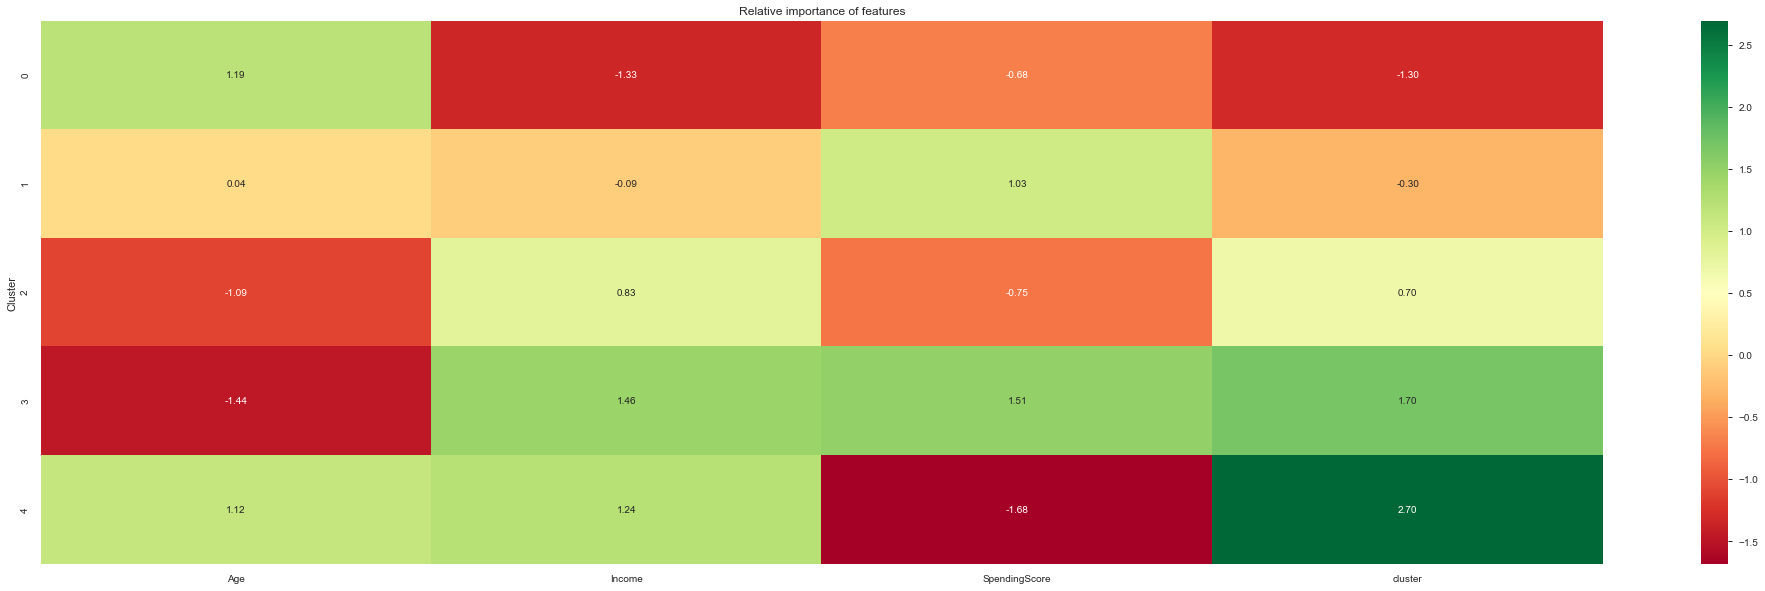

In [42]:
#relative importance features
import seaborn as sns 
dat = X.copy()

dat['Cluster'] = k_means.labels_

cluster_avg = dat.groupby(['Cluster']).mean()
population_avg = dat.drop(['Cluster'], axis=1).mean()

relative_imp = cluster_avg - population_avg

plt.figure(figsize=(35, 10));
plt.title('Relative importance of features');
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn');

In [28]:
jewelry_customer['KMeans_5_Cluster'] = k_means.labels_
jewelry_customer.head()

,Age,Income,SpendingScore,KMeans_5_Cluster
0,58,77769,0.791329,1
1,59,81799,0.791082,1
2,62,74751,0.702657,1
3,59,74373,0.765680,1
4,87,17760,0.348778,0


In [32]:
#creating CSV for clustering
df_final = pd.DataFrame(jewelry_customer)
df_final.head()
df_final.to_csv('Jewelry_customer.csv', index=True)

,Age,Income,SpendingScore,KMeans_5_Cluster
0,58,77769,0.791329,1
1,59,81799,0.791082,1
2,62,74751,0.702657,1
3,59,74373,0.765680,1
4,87,17760,0.348778,0


# Hirarchical Clustering

In [33]:
agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

In [34]:
agg.labels_

array([0, 0, 0, 0, 2, 3, 0, 2, 2, 2, 4, 1, 1, 1, 0, 4, 0, 2, 2, 4, 1, 4,
       0, 2, 4, 3, 3, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 1, 1, 0, 2, 3, 0,
       0, 3, 4, 3, 1, 0, 2, 1, 3, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 3, 3, 0, 0, 1, 2, 2, 1, 0, 1, 0, 0, 3, 0, 4, 0, 2, 2, 1, 1, 0,
       0, 0, 0, 0, 3, 2, 0, 3, 1, 0, 0, 1, 1, 3, 1, 3, 1, 2, 2, 1, 1, 0,
       2, 1, 0, 1, 1, 1, 0, 1, 3, 2, 1, 2, 2, 2, 1, 4, 0, 2, 0, 0, 1, 0,
       1, 0, 3, 2, 4, 3, 0, 1, 2, 0, 0, 3, 0, 3, 0, 4, 0, 2, 0, 1, 2, 0,
       2, 4, 1, 0, 2, 0, 1, 2, 0, 1, 2, 1, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0,
       0, 2, 2, 2, 0, 0, 1, 3, 3, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 3, 1,
       2, 2, 2, 1, 0, 1, 0, 1, 0, 2, 3, 0, 2, 2, 2, 2, 0, 2, 1, 3, 1, 2,
       0, 0, 1, 2, 1, 3, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 3, 0,
       0, 0, 4, 0, 1, 2, 3, 3, 3, 2, 0, 1, 2, 2, 1, 1, 0, 0, 4, 0, 0, 2,
       0, 2, 1, 3, 0, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 1, 1, 4, 1, 2,
       2, 1, 4, 2, 2, 3, 0, 1, 1, 0, 1, 2, 2, 1, 0,

In [35]:
silhouette_score(X, agg.labels_)

0.8543105542695458

<Figure size 576x396 with 0 Axes>

Text(0.5, 1.0, 'Agglomerative')

Text(0.5, 0, 'Income')

Text(0, 0.5, 'Spending Score')

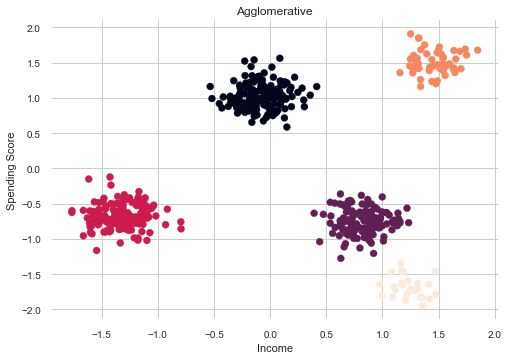

In [29]:
plt.figure();

plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=agg.labels_);
plt.title("Agglomerative");
plt.xlabel('Income');
plt.ylabel('Spending Score');
plt.grid()

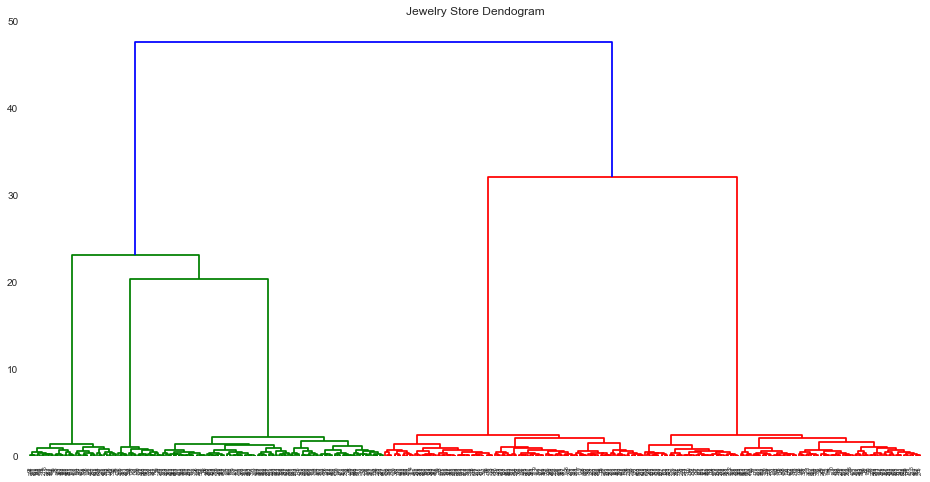

In [30]:
#dendogram, linkage and distance metrics

import scipy.cluster

aggl = scipy.cluster.hierarchy.linkage(X, method='ward', metric='euclidean')

# Plot the dendogram
plt.figure(figsize=(16, 8));
plt.grid(False)
plt.title("Jewelry Store Dendogram");  
dend = scipy.cluster.hierarchy.dendrogram(aggl);

# DBSCAN

In [31]:
db = DBSCAN(eps=0.3, min_samples=3)
db.fit(X)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

In [32]:
db.labels_

array([ 0,  0,  0,  0,  1,  2,  0,  1,  1,  1,  3,  4,  4,  4,  0,  3,  0,
        1,  1,  3,  4,  3,  0,  1,  3,  2,  2,  0,  1,  0,  0,  0,  1,  0,
        4,  0,  1,  0,  4,  4,  0,  1,  2,  0,  0,  2,  3,  2,  4,  0,  1,
        4,  2,  1,  0,  1,  4,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  2,
        2,  0,  0,  4,  1,  1,  4,  0,  4,  0,  0,  2,  0,  3,  0,  1,  1,
        4,  4,  0,  0,  0,  0,  0,  2,  1,  0,  2,  4,  0,  0,  4,  4,  2,
        4,  2,  4,  1,  1,  4,  4,  0,  1,  4,  0,  4,  4,  4,  0,  4,  2,
        1,  4,  1,  1,  1,  4,  3,  0,  1,  0,  0,  4,  0,  4,  0,  2,  1,
        3,  2,  0,  4,  1,  0,  0,  2,  0,  2,  0,  3,  0,  1,  0,  4,  1,
        0,  1,  3,  4,  0,  1,  0,  4,  1,  0,  4,  1,  4,  1,  0,  4,  0,
        1,  0,  4,  0,  1,  0,  0,  1,  1,  1,  0,  0,  4,  2,  2,  1,  4,
        0,  0,  0,  4,  1,  0,  0,  0,  1,  2,  4,  1,  1,  1,  4,  0,  4,
        0,  4,  0,  1,  2,  0,  1,  1,  1,  1,  0,  1,  4,  2,  4,  1,  0,
        0,  4,  1,  4,  2

In [33]:
silhouette_score(X, db.labels_)

0.7177125757485263

<Figure size 576x396 with 0 Axes>

Text(0.5, 1.0, '')

Text(0.5, 1.0, 'DBSCAN (n_clusters = 5, black = outliers)')

Text(0.5, 0, 'Income')

Text(0, 0.5, 'Spending Score')

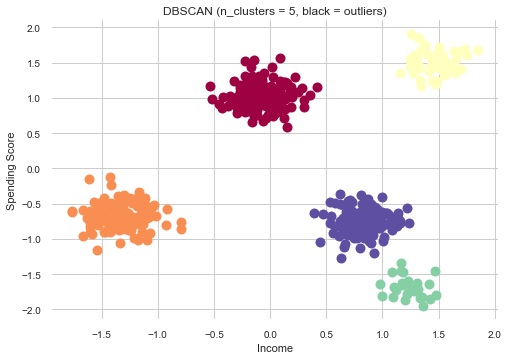

In [35]:
plt.figure();

unique_labels = set(db.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))];

for k in unique_labels:
    if k == -1:        # Black used for noise.
        col = [0, 0, 0, 1]
    else:
        col = colors[k]

    xy = X[db.labels_ == k]
    plt.plot(xy.iloc[:, 1], xy.iloc[:, 2], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10);

    
plt.title('');
plt.title("DBSCAN (n_clusters = {:d}, black = outliers)".format(len(unique_labels)));
plt.xlabel('Income');
plt.ylabel('Spending Score');
plt.grid()

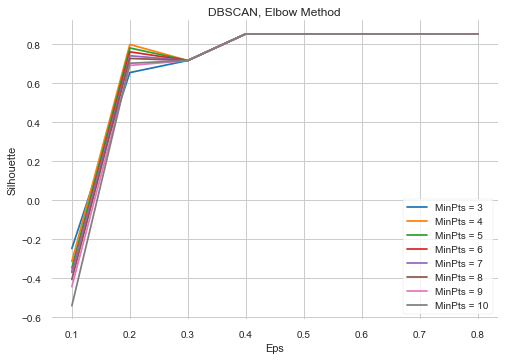

In [36]:
silhouettes = {}

epss = np.arange(0.1, 0.9, 0.1)
minss = [3, 4, 5, 6, 7, 8, 9, 10]

ss = np.zeros((len(epss), len(minss)))

for i, eps in enumerate(epss):
    for j, mins in enumerate(minss):
        db = DBSCAN(eps=eps, min_samples=mins).fit(X)
        if len(set(db.labels_)) == 1:
            ss[i, j] = -1
        else:
            ss[i, j] = silhouette_score(X, db.labels_, metric='euclidean')
    

plt.figure();
#plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
for i in range(len(minss)):
    plt.plot(epss, ss[:, i], label="MinPts = {}".format(minss[i]));
#plt.plot(epss, ss[:, 1]);
plt.title('DBSCAN, Elbow Method')
plt.xlabel("Eps");
plt.ylabel("Silhouette");
plt.grid()
plt.legend();


eps=0.3, min_samples=2, n_clusters=5, sil=0.7177125757485263


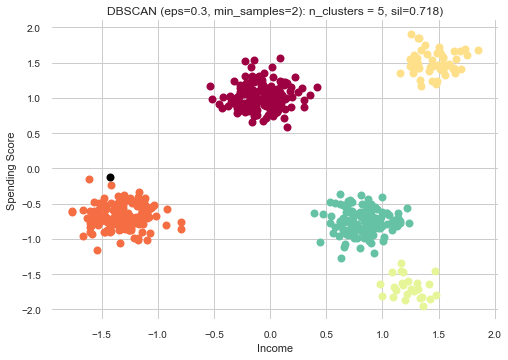

eps=0.1, min_samples=3, n_clusters=24, sil=-0.2473150724898062


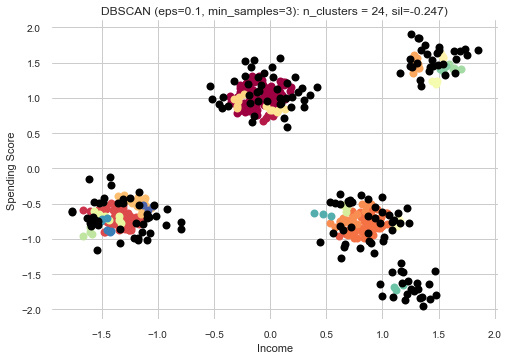

eps=0.3, min_samples=3, n_clusters=5, sil=0.7177125757485263


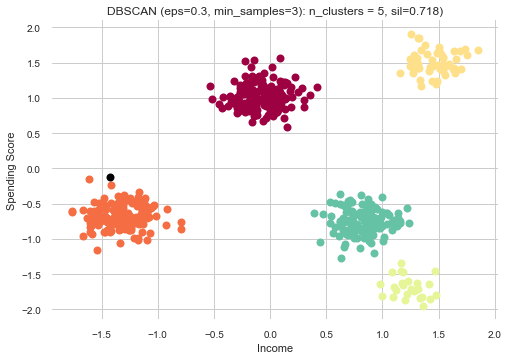

eps=0.6, min_samples=3, n_clusters=4, sil=0.8543105542695458


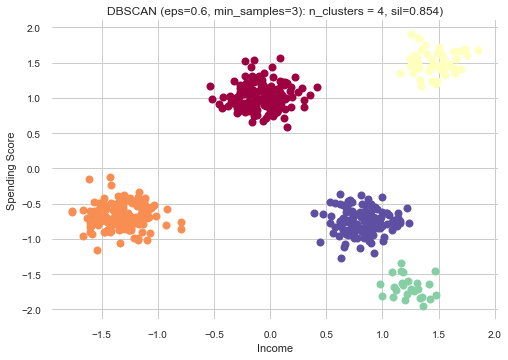

eps=0.6, min_samples=7, n_clusters=4, sil=0.8543105542695458


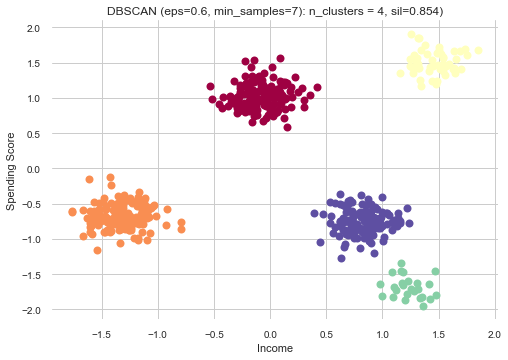

eps=0.36, min_samples=3, n_clusters=4, sil=0.8543105542695458


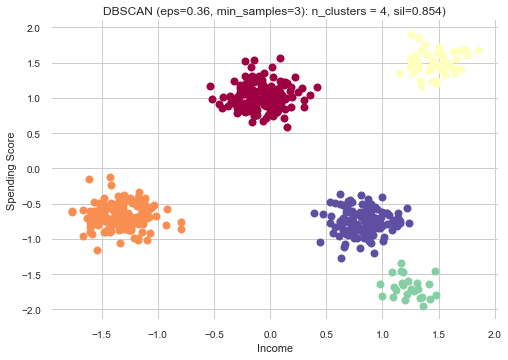

In [37]:
def do_and_plot_dbscan(X, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)

    unique_labels = set(db.labels_)
    n_clusters = len(unique_labels) - 1
    
    if n_clusters <= 1:
        #print('eps={}, min_samples={}, n_clusters <= 1. Returning.'.format(eps, min_samples))
        #return
        sil = -1
    else:
        sil = silhouette_score(X, db.labels_)
    
    print("eps={}, min_samples={}, n_clusters={}, sil={}".format(eps, min_samples, n_clusters, sil))
    
    plt.figure();
    
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))];

    for k in unique_labels:
        if k == -1:        # Black used for noise.
            col = [0, 0, 0, 1]
        else:
            col = colors[k]

        xy = X[db.labels_ == k]
        plt.plot(xy.iloc[:, 1], xy.iloc[:, 2], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=8);


    plt.title('');
    plt.title("DBSCAN (eps={}, min_samples={}): n_clusters = {:d}, sil={:.3f})".format(eps, min_samples, n_clusters, sil));
    plt.xlabel('Income');
    plt.ylabel('Spending Score');
    plt.grid()
    plt.show()


do_and_plot_dbscan(X, 0.3, 2)
do_and_plot_dbscan(X, 0.1, 3)
do_and_plot_dbscan(X, 0.3, 3)
do_and_plot_dbscan(X, 0.6, 3)
do_and_plot_dbscan(X, 0.6, 7)
do_and_plot_dbscan(X, 0.36, 3)


# GMM (Gaussian Mixture Models)

In [38]:
gmm = GaussianMixture(n_components=5, covariance_type='full').fit(X)

labels = gmm.predict(X)
silhouette_score(X, labels)

0.8543105542695458

<Figure size 1152x720 with 0 Axes>

Text(0.5, 1.0, 'GMM')

Text(0.5, 0, 'Income')

Text(0, 0.5, 'Spending Score')

(array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 <a list of 10 Text major ticklabel objects>)

(array([-2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 <a list of 11 Text major ticklabel objects>)

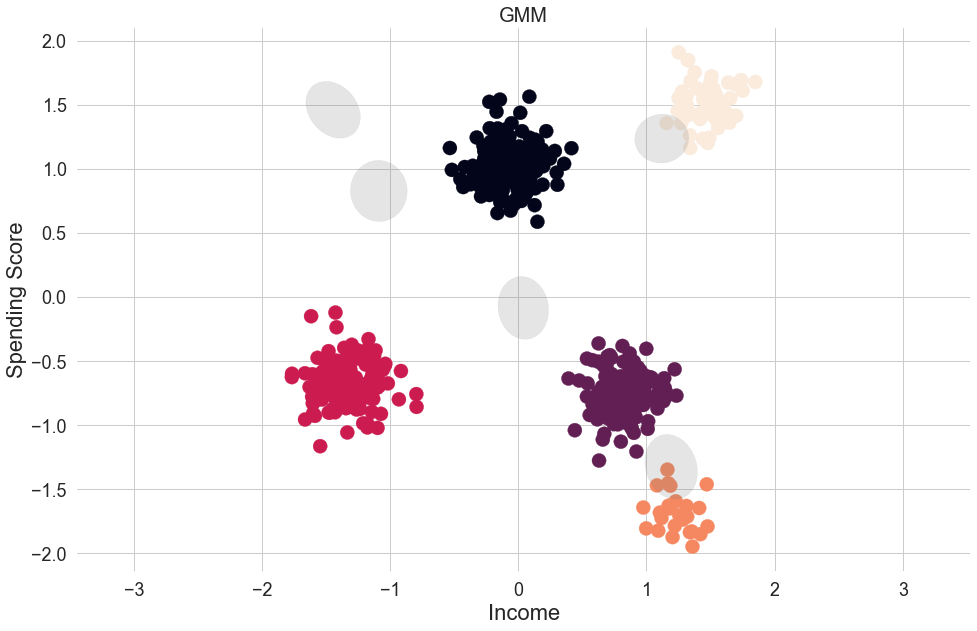

In [39]:
import matplotlib as mpl

def make_ellipses(gmm, ax):
    for n, label in enumerate(set(labels)):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color='grey')
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.2)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

plt.figure(figsize=(16, 10));
plt.grid(True);

plt.scatter(X.iloc[:, 1], X.iloc[:, 2], s=200, c=labels);
make_ellipses(gmm, plt.gca())
plt.title("GMM", fontsize=20);
plt.xlabel('Income', fontsize=22);
plt.ylabel('Spending Score', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.grid(True)